## Este notebook contiene los siguientes pasos de transformación de datos del dataset grande de Airbnb:
- Transformación de las columnas categóricas a través de Ordinal Encoder y OneHot Encoder
- Prueba de varios modelos de Machine Learning
- Comparación de las métricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost
import catboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

import sys

import warnings
warnings.filterwarnings("ignore")

## El dataset pequeño sin outliers (utilizando el método rango intequartil/IQR) SIN hacer la agrupación por cada comunidad autónoma

In [2]:
small_data_no_outliers_cols_3 = pd.read_csv("../data/output_data_1/small_data_no_outliers_cols_3.csv", encoding="utf-8")
small_data_no_outliers_cols_3 = small_data_no_outliers_cols_3.drop("Unnamed: 0", axis=1)
small_data_no_outliers_cols_3

,id,minimum_nights,availability_60,host_acceptance_rate,bedrooms,host_verifications,availability_90,ine_percent_vacation_rental,host_total_listings_count,review_scores_cleanliness,...,has_availability,room_type,license,host_since,host_identity_verified,host_response_time,host_has_profile_pic,last_review,instant_bookable,host_is_superhost
0,18674,1,15,0.94,3.0,2,30,1.28,42,4.63,...,t,Entire home/apt,HUTB-002062,2010-01-19,t,within an hour,t,2022-10-07,t,f
1,124342,3,17,0.43,1.0,2,47,1.28,7,4.61,...,t,Private room,HUTB-123456,2011-05-01,f,within a day,t,2022-10-28,f,f
2,128463,3,23,1.00,1.0,2,38,1.28,1,4.94,...,t,Private room,HUTB-012603,2011-05-28,t,within an hour,t,2022-12-04,t,t
3,130227,31,0,1.00,3.0,2,30,1.28,1,4.92,...,t,Private room,Exempt,2011-05-30,t,No Response Time,t,2022-09-25,f,f
4,135513,90,60,0.18,2.0,2,90,1.28,2,4.68,...,t,Entire home/apt,No License,2011-06-04,t,within an hour,t,2021-09-23,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,3675253,2,46,0.86,2.0,3,70,1.64,27,4.57,...,t,Entire home/apt,No License,2014-07-20,t,within an hour,t,2022-12-06,f,f
800,3684986,2,31,0.86,2.0,3,52,1.64,27,4.56,...,t,Entire home/apt,No License,2014-07-20,t,within an hour,t,2022-12-05,f,f
801,3719698,3,0,0.95,2.0,2,0,1.64,1,4.83,...,t,Entire home/apt,No License,2014-07-27,f,No Response Time,t,2016-09-01,f,f
802,3736295,2,59,0.86,3.0,3,89,1.64,18,4.64,...,t,Entire home/apt,AT-34420-A,2011-11-09,t,within a few hours,t,2022-11-01,f,f


In [3]:
small_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            804 non-null    int64  
 1   minimum_nights                                804 non-null    int64  
 2   availability_60                               804 non-null    int64  
 3   host_acceptance_rate                          804 non-null    float64
 4   bedrooms                                      804 non-null    float64
 5   host_verifications                            804 non-null    int64  
 6   availability_90                               804 non-null    int64  
 7   ine_percent_vacation_rental                   804 non-null    float64
 8   host_total_listings_count                     804 non-null    int64  
 9   review_scores_cleanliness                     804 non-null    flo

### Elige las columnas categóricas

In [4]:
cat_cols = small_data_no_outliers_cols_3.select_dtypes(include="object").columns
cat_cols

Index(['state', 'first_review', 'has_availability', 'room_type', 'license',
       'host_since', 'host_identity_verified', 'host_response_time',
       'host_has_profile_pic', 'last_review', 'instant_bookable',
       'host_is_superhost'],
      dtype='object')

### Comprueba valores nulos en columnas categóricas. No los debería haber porque los había tratado en el notebook anterior.

In [5]:
sys.path.insert(0, '../functions')
import data_report as dr


dr.data_report(small_data_no_outliers_cols_3[cat_cols]).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
state,object,0.0,6,0.75
first_review,object,0.0,592,73.63
has_availability,object,0.0,1,0.12
room_type,object,0.0,4,0.5
license,object,0.0,476,59.2
host_since,object,0.0,517,64.3
host_identity_verified,object,0.0,2,0.25
host_response_time,object,0.0,5,0.62
host_has_profile_pic,object,0.0,1,0.12


### Comprueba los valores únicos de cada columna categórica para decidir el tipo de encoding

In [6]:
for col in cat_cols:
	print(col, "\n", len(small_data_no_outliers_cols_3[col].unique()), "\n", small_data_no_outliers_cols_3[col].unique())
	print("----------------------------")

state 
 6 
 ['Cataluña' 'País Vasco' 'Comunidad de Madrid' 'Andalucía'
 'Islas Baleares' 'Comunidad Valenciana']
----------------------------
first_review 
 592 
 ['2013-05-27' '2011-06-01' '2011-09-03' '2014-04-29' '2011-10-05'
 '2011-03-15' '2011-09-25' '2011-07-17' '2012-06-11' '2012-08-20'
 '2011-11-01' '2010-10-03' '2011-07-04' '2011-09-28' '2011-06-16'
 '2012-05-14' '2011-08-12' '2011-01-04' '2012-04-19' '2012-03-13'
 '2013-04-27' '2013-08-21' '2011-04-25' '2012-07-26' '2022-10-14'
 '2011-06-23' '2016-06-09' '2011-03-27' '2022-06-24' '2011-05-08'
 '2014-08-19' '2012-08-11' '2011-09-08' '2011-12-20' '2011-06-04'
 '2014-05-12' '2012-08-16' '2012-04-21' '2012-06-04' '2012-12-27'
 '2012-07-02' '2011-04-20' '2012-01-07' '2013-08-19' '2012-06-18'
 '2011-12-05' '2011-11-06' '2012-04-25' '2013-01-02' '2011-05-24'
 '2012-06-13' '2012-06-14' '2011-12-27' '2016-07-08' '2012-04-12'
 '2012-04-27' '2015-02-20' '2013-06-03' '2013-02-24' '2011-12-22'
 '2012-07-10' '2015-07-16' '2012-06-27' '2012

Comentario:
<br><br><b>Ordinal Encoding</b>
<br><br>Les voy a aplicar el Ordinal Encoding a las siguientes columnas porque tienen nivel de importancia. 
- "host_has_profile_pic" --> La escala será del 0 al 1, desde la menos importante hasta la más importante: 'f', 't'.
- "host_is_superhost" --> La escala será del 0 al 1, desde la menos importante hasta la más importante: 'f', 't'.
- "instant_bookable" --> La escala será del 0 al 1, desde la menos importante hasta la más importante: 'f', 't'.
- "has_availability" --> La escala será del 0 al 1, desde la menos importante hasta la más importante: 'f', 't'.
- "first_review" --> le voy a convertir a una columna categórica donde los valores serán "Yes" (tiene primera reseña) o "No" (no tiene primera reseña). Una vez sea una columna categórica, le aplicaré el Ordinal Encoding. La escala será del 0 al 1, desde la menos importante hasta la más importante: "No", "Yes".
- "host_response_time" --> La escala será del 0 al 4, desde la menos importante hasta la más importante: 'No Response Time', 'within an hour', 'within a few hours', 'within a day', 'a few days or more'.
- "host_identity_verified" --> La escala será del 0 al 1, desde la menos importante hasta la más importante: 'f', 't'.
- "last_review" --> le voy a convertir a una columna categórica donde los valores serán "Yes" (tiene última reseña) o "No" (no tiene última reseña). Una vez sea una columna categórica, le aplicaré el Ordinal Encoding. La escala será del 0 al 1, desde la menos importante hasta la más importante: "No", "Yes".
- "room_type" --> La escala será del 0 al 3, desde la menos importante hasta la más importante: 'Shared room', 'Private room', 'Hotel room', 'Entire home/apt', suponiendo que los alojamientos con estas categorías tienen las mismas carácterísticas (por ej: están ubicados en la misma zona y en un edificio nuevo, etc.).
- "host_since" --> le voy a extraer el año y luego le aplicaré el Ordinal Encoding en base a la antiguedad. El año más reciente será menos importante que el año más antiguo.
- "license" --> le voy a convertir a una columna categórica donde los valores serán "Yes" (tiene licencia) o "No" (no tiene licencia). Una vez sea una columna categórica, le aplicaré el Ordinal Encoding. La escala será del 0 al 1, desde la menos importante hasta la más importante: "No", "Yes".


<b>One Hot Encoding</b>
- "state" --> le voy a aplicar el One Hot Encoding.

## 1) Ordinal Encoding

### Aplica el Ordinal Encoding a las columnas de arriba

In [7]:
cat_cols = list(cat_cols)

In [8]:
cat_cols.append(cat_cols.pop(cat_cols.index('state')))
cat_cols

['first_review',
 'has_availability',
 'room_type',
 'license',
 'host_since',
 'host_identity_verified',
 'host_response_time',
 'host_has_profile_pic',
 'last_review',
 'instant_bookable',
 'host_is_superhost',
 'state']

In [9]:
cat_cols_ordinal = cat_cols[:-1]
cat_cols_ordinal

['first_review',
 'has_availability',
 'room_type',
 'license',
 'host_since',
 'host_identity_verified',
 'host_response_time',
 'host_has_profile_pic',
 'last_review',
 'instant_bookable',
 'host_is_superhost']

In [10]:
for col in cat_cols_ordinal:
    print(col, "\n", len(small_data_no_outliers_cols_3[col].unique()), "\n", small_data_no_outliers_cols_3[col].unique())
    print("---------------------")

first_review 
 592 
 ['2013-05-27' '2011-06-01' '2011-09-03' '2014-04-29' '2011-10-05'
 '2011-03-15' '2011-09-25' '2011-07-17' '2012-06-11' '2012-08-20'
 '2011-11-01' '2010-10-03' '2011-07-04' '2011-09-28' '2011-06-16'
 '2012-05-14' '2011-08-12' '2011-01-04' '2012-04-19' '2012-03-13'
 '2013-04-27' '2013-08-21' '2011-04-25' '2012-07-26' '2022-10-14'
 '2011-06-23' '2016-06-09' '2011-03-27' '2022-06-24' '2011-05-08'
 '2014-08-19' '2012-08-11' '2011-09-08' '2011-12-20' '2011-06-04'
 '2014-05-12' '2012-08-16' '2012-04-21' '2012-06-04' '2012-12-27'
 '2012-07-02' '2011-04-20' '2012-01-07' '2013-08-19' '2012-06-18'
 '2011-12-05' '2011-11-06' '2012-04-25' '2013-01-02' '2011-05-24'
 '2012-06-13' '2012-06-14' '2011-12-27' '2016-07-08' '2012-04-12'
 '2012-04-27' '2015-02-20' '2013-06-03' '2013-02-24' '2011-12-22'
 '2012-07-10' '2015-07-16' '2012-06-27' '2012-05-21' '2012-08-15'
 '2011-11-10' '2011-04-26' '2011-07-08' '2012-07-16' '2012-06-19'
 '2012-03-02' '2012-11-07' '2012-06-30' '2018-07-13' '2

In [11]:
# Convierte las siguientes columnas a columnas categóricas
small_data_no_outliers_cols_3['first_review'] = small_data_no_outliers_cols_3['first_review'].apply(lambda x: 'No' if 'No Review' in x else 'Yes')

small_data_no_outliers_cols_3['last_review'] = small_data_no_outliers_cols_3['last_review'].apply(lambda x: 'No' if 'No Review' in x else 'Yes')

small_data_no_outliers_cols_3['license'] = small_data_no_outliers_cols_3['license'].apply(lambda x: 'No' if 'No License' in x else 'Yes')

small_data_no_outliers_cols_3["host_since"] = pd.to_datetime(small_data_no_outliers_cols_3["host_since"])
small_data_no_outliers_cols_3["host_since"] = small_data_no_outliers_cols_3["host_since"].dt.year

In [12]:
sorted_year = sorted(small_data_no_outliers_cols_3["host_since"].unique())
sorted_year

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2019, 2020]

In [13]:
# Ordena la lista de categorías desde la menos importante hasta la más importante. Por defecto, empieza del 0.
ordinal_host_profile_pic = ['f', 't']
ordinal_superhost = ['f', 't']
ordinal_instant_bookable = ['f', 't']
ordinal_availability = ['f', 't']
ordinal_first_review = ["No", "Yes"] # TBA
ordinal_host_response_time = ['No Response Time', 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
ordinal_host_identity_verified = ['f', 't']
ordinal_last_review = ["No", "Yes"] # TBA
ordinal_room = ['Shared room', 'Private room', 'Hotel room', 'Entire home/apt']
ordinal_host_since = sorted_year # TBA
ordinal_license = ["No", "Yes"]


# Instancia la clase de Ordinal Encoder
ordinal = OrdinalEncoder(categories=[ordinal_host_profile_pic, ordinal_superhost, ordinal_instant_bookable, ordinal_availability,
                                     ordinal_first_review, ordinal_host_response_time, ordinal_host_identity_verified, ordinal_last_review,
                                     ordinal_room, ordinal_host_since, ordinal_license])

# Ordena la lista de ordinal segun la lista de categorías en la variable "ordinal" de arriba
cat_cols_ordinal = ['host_has_profile_pic',
                    'host_is_superhost',
                    'instant_bookable',
                    'has_availability',
                    'first_review',
                    'host_response_time',
                    'host_identity_verified',
                    'last_review',
                    'room_type',
                    'host_since',
                    'license']

# Crea una variable y hay que ponerle un array de 2D o un dataframe
encoded_cols = ordinal.fit_transform(small_data_no_outliers_cols_3[cat_cols_ordinal])

#  Asigna las columnas codificadas al dataframe
small_data_no_outliers_cols_3[cat_cols_ordinal] = encoded_cols

In [14]:
ordinal.categories_

[array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No Response Time', 'within an hour', 'within a few hours',
        'within a day', 'a few days or more'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Shared room', 'Private room', 'Hotel room', 'Entire home/apt'],
       dtype=object),
 array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2019, 2020],
       dtype=int64),
 array(['No', 'Yes'], dtype=object)]

## 2) One Hot Encoding

In [15]:
cat_cols

['first_review',
 'has_availability',
 'room_type',
 'license',
 'host_since',
 'host_identity_verified',
 'host_response_time',
 'host_has_profile_pic',
 'last_review',
 'instant_bookable',
 'host_is_superhost',
 'state']

In [16]:
cat_cols_onehot = [cat_cols[-1]]
cat_cols_onehot

['state']

In [17]:
# Instancia la clase de OneHot Encoder
onehot = OneHotEncoder(sparse=False)

# Crea una variable y hay que ponerle un array de 2D o un dataframe
encoded_cols = onehot.fit_transform(small_data_no_outliers_cols_3[cat_cols_onehot])

# Instancia la clase ColumnTransformer
ct = ColumnTransformer([('onehot', onehot, cat_cols_onehot)], remainder='passthrough')

# fitea los datos
ct.fit(small_data_no_outliers_cols_3[cat_cols_onehot])

# transforma los datos and consigue el nuevo nombre de las columas
encoded_data = ct.transform(small_data_no_outliers_cols_3)
feature_names = ct.get_feature_names_out()

#  Asigna las columnas codificadas al dataframe
small_data_no_outliers_cols_3[feature_names] = encoded_cols

In [18]:
onehot.categories_

[array(['Andalucía', 'Cataluña', 'Comunidad Valenciana',
        'Comunidad de Madrid', 'Islas Baleares', 'País Vasco'],
       dtype=object)]

In [19]:
cat_cols_onehot_after = list(feature_names)
cat_cols_onehot_after

['onehot__state_Andalucía',
 'onehot__state_Cataluña',
 'onehot__state_Comunidad Valenciana',
 'onehot__state_Comunidad de Madrid',
 'onehot__state_Islas Baleares',
 'onehot__state_País Vasco']

In [20]:
# Quita la columa "state" porque ya tenemos su desglose de OneHot
small_data_no_outliers_cols_3 = small_data_no_outliers_cols_3.drop("state", axis=1)

In [21]:
small_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            804 non-null    int64  
 1   minimum_nights                                804 non-null    int64  
 2   availability_60                               804 non-null    int64  
 3   host_acceptance_rate                          804 non-null    float64
 4   bedrooms                                      804 non-null    float64
 5   host_verifications                            804 non-null    int64  
 6   availability_90                               804 non-null    int64  
 7   ine_percent_vacation_rental                   804 non-null    float64
 8   host_total_listings_count                     804 non-null    int64  
 9   review_scores_cleanliness                     804 non-null    flo

### Double check

In [22]:
small_data_no_outliers_cols_3.columns

Index(['id', 'minimum_nights', 'availability_60', 'host_acceptance_rate',
       'bedrooms', 'host_verifications', 'availability_90',
       'ine_percent_vacation_rental', 'host_total_listings_count',
       'review_scores_cleanliness', 'maximum_maximum_nights',
       'calculated_host_listings_count_shared_rooms', 'host_listings_count',
       'review_scores_location', 'calculated_host_listings_count',
       'bathrooms_text', 'availability_30', 'review_scores_checkin',
       'calculated_host_listings_count_entire_homes', 'availability_365',
       'calculated_host_listings_count_private_rooms', 'review_scores_value',
       'minimum_maximum_nights', 'maximum_nights', 'review_scores_rating',
       'host_response_rate', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'number_of_reviews_ltm',
       'minimum_nights_avg_ntm', 'number_of_reviews_l30d', 'reviews_per_month',
       'ine_num_tourists_vacation_rental', 'maximum_nights_avg_ntm',
       'number_of_reviews', 'ine_nu

In [23]:
# double check ordinal
small_data_no_outliers_cols_3[cat_cols_ordinal].head(5)

,host_has_profile_pic,host_is_superhost,instant_bookable,has_availability,first_review,host_response_time,host_identity_verified,last_review,room_type,host_since,license
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0
1,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,3.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0


In [24]:
# double check onehot
small_data_no_outliers_cols_3[small_data_no_outliers_cols_3['onehot__state_Andalucía'] == 1]['onehot__state_Andalucía'].unique()

array([1.])

In [25]:
# double check onehot
small_data_no_outliers_cols_3[small_data_no_outliers_cols_3['onehot__state_Andalucía'] == 0]['onehot__state_Andalucía'].unique()

array([0.])

In [26]:
small_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            804 non-null    int64  
 1   minimum_nights                                804 non-null    int64  
 2   availability_60                               804 non-null    int64  
 3   host_acceptance_rate                          804 non-null    float64
 4   bedrooms                                      804 non-null    float64
 5   host_verifications                            804 non-null    int64  
 6   availability_90                               804 non-null    int64  
 7   ine_percent_vacation_rental                   804 non-null    float64
 8   host_total_listings_count                     804 non-null    int64  
 9   review_scores_cleanliness                     804 non-null    flo

In [27]:
# Colocamos la columna "price" al último índice
all_selected_cols = list(small_data_no_outliers_cols_3.columns)
all_selected_cols.append(all_selected_cols.pop(all_selected_cols.index('price')))
all_selected_cols

['id',
 'minimum_nights',
 'availability_60',
 'host_acceptance_rate',
 'bedrooms',
 'host_verifications',
 'availability_90',
 'ine_percent_vacation_rental',
 'host_total_listings_count',
 'review_scores_cleanliness',
 'maximum_maximum_nights',
 'calculated_host_listings_count_shared_rooms',
 'host_listings_count',
 'review_scores_location',
 'calculated_host_listings_count',
 'bathrooms_text',
 'availability_30',
 'review_scores_checkin',
 'calculated_host_listings_count_entire_homes',
 'availability_365',
 'calculated_host_listings_count_private_rooms',
 'review_scores_value',
 'minimum_maximum_nights',
 'maximum_nights',
 'review_scores_rating',
 'host_response_rate',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'number_of_reviews_ltm',
 'minimum_nights_avg_ntm',
 'number_of_reviews_l30d',
 'reviews_per_month',
 'ine_num_tourists_vacation_rental',
 'maximum_nights_avg_ntm',
 'number_of_reviews',
 'ine_num_vacation_rental',
 'accommodates',
 'amenities',
 'idealista_sell(E

In [28]:
small_data_no_outliers_cols_3 = small_data_no_outliers_cols_3[all_selected_cols]
small_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            804 non-null    int64  
 1   minimum_nights                                804 non-null    int64  
 2   availability_60                               804 non-null    int64  
 3   host_acceptance_rate                          804 non-null    float64
 4   bedrooms                                      804 non-null    float64
 5   host_verifications                            804 non-null    int64  
 6   availability_90                               804 non-null    int64  
 7   ine_percent_vacation_rental                   804 non-null    float64
 8   host_total_listings_count                     804 non-null    int64  
 9   review_scores_cleanliness                     804 non-null    flo

In [29]:
# Este dataset ya tiene todas las columnas transformadas a números
# Este dataset contiene datos externos (de Idealista e INE)
small_data_no_outliers_cols_3.to_csv("../data/output_data_5/small_data_no_outliers_cols_3.csv")

In [30]:
# Este dataset SÓLO contiene datos de Airbnb
drop_ext_cols = ['idealista_sell(EUR/m2)', 'idealista_rental(EUR/m2/month)', 'ine_num_vacation_rental', 'ine_num_tourists_vacation_rental',
                 'ine_percent_vacation_rental']

small_data_no_outliers_cols_3_wo_ext = small_data_no_outliers_cols_3.copy()

small_data_no_outliers_cols_3_wo_ext = small_data_no_outliers_cols_3_wo_ext.drop(drop_ext_cols, axis=1)

small_data_no_outliers_cols_3_wo_ext.to_csv("../data/output_data_5/without_external_data/small_data_no_outliers_cols_3_wo_ext.csv")

small_data_no_outliers_cols_3_wo_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            804 non-null    int64  
 1   minimum_nights                                804 non-null    int64  
 2   availability_60                               804 non-null    int64  
 3   host_acceptance_rate                          804 non-null    float64
 4   bedrooms                                      804 non-null    float64
 5   host_verifications                            804 non-null    int64  
 6   availability_90                               804 non-null    int64  
 7   host_total_listings_count                     804 non-null    int64  
 8   review_scores_cleanliness                     804 non-null    float64
 9   maximum_maximum_nights                        804 non-null    int

### Correlación entre los features y el target

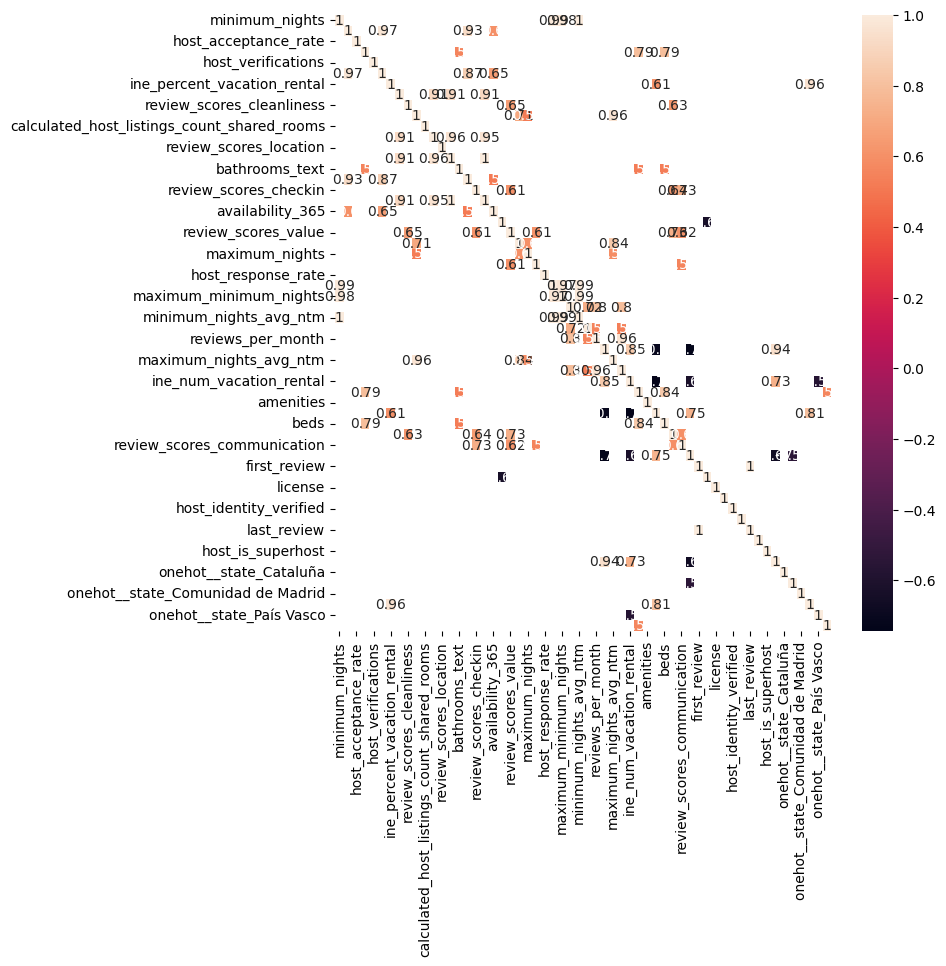

In [31]:
sys.path.insert(0, '../functions')
import find_correlation as fc


plt.figure(figsize=(8, 8))
sns.heatmap(fc.func(small_data_no_outliers_cols_3.iloc[:, 1:].corr(), 0.5, "both", drop=True), annot=True);

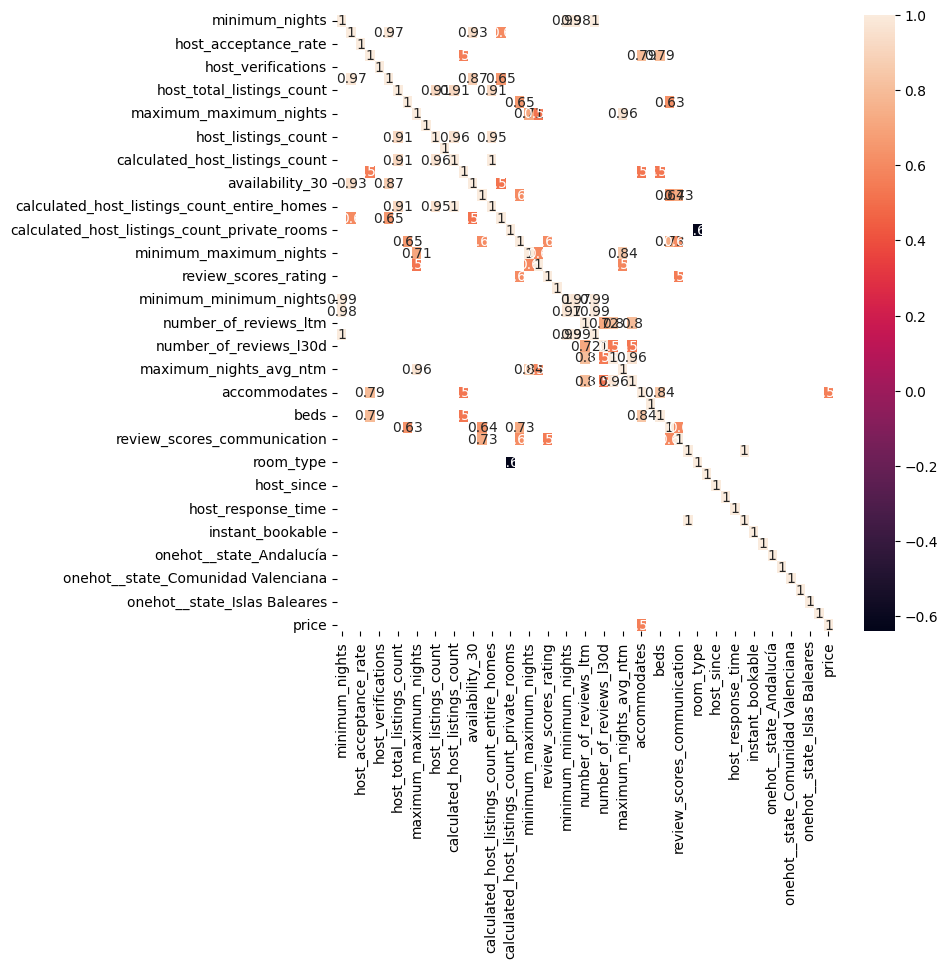

In [32]:
plt.figure(figsize=(8, 8))
sns.heatmap(fc.func(small_data_no_outliers_cols_3_wo_ext.iloc[:, 1:].corr(), 0.5, "both", drop=True), annot=True);

Comentario:
- Hay bastante correlación positiva entre el feature "Islas Baleares" y el target (price) --> CHECK!!!!
- Hay bastante correlación positiva entre el feature "INE-Percentage Vacation Rental" y el target (price) --> CHECK!!!!

## Machine Learning

### 1) Prueba el dataset "small_data_no_outliers_cols_3" que:
- tiene precios de IQR SIN agrupar por cada comunidad autónoma
- contiene datos externos (de Idealista e INE)

### Determina los features(X) y el target(y)

In [33]:
small_data_no_outliers_cols_3.columns

Index(['id', 'minimum_nights', 'availability_60', 'host_acceptance_rate',
       'bedrooms', 'host_verifications', 'availability_90',
       'ine_percent_vacation_rental', 'host_total_listings_count',
       'review_scores_cleanliness', 'maximum_maximum_nights',
       'calculated_host_listings_count_shared_rooms', 'host_listings_count',
       'review_scores_location', 'calculated_host_listings_count',
       'bathrooms_text', 'availability_30', 'review_scores_checkin',
       'calculated_host_listings_count_entire_homes', 'availability_365',
       'calculated_host_listings_count_private_rooms', 'review_scores_value',
       'minimum_maximum_nights', 'maximum_nights', 'review_scores_rating',
       'host_response_rate', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'number_of_reviews_ltm',
       'minimum_nights_avg_ntm', 'number_of_reviews_l30d', 'reviews_per_month',
       'ine_num_tourists_vacation_rental', 'maximum_nights_avg_ntm',
       'number_of_reviews', 'ine_nu

In [34]:
X = small_data_no_outliers_cols_3.iloc[:, 1:-1]
y = small_data_no_outliers_cols_3["price"]

### Divide el dataset en train y test

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(643, 59)
(643,)
(161, 59)
(161,)


### Escala los datos de X

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[ 1.23731396,  0.2992098 ,  0.43980316, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.32267207,  0.0807316 , -0.62333005, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.21508683, -0.48731171, -2.05855989, ..., -0.38231866,
        -0.50582544, -0.34105637],
       ...,
       [-0.21508683, -1.27383323,  0.33348984, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.12942696,  0.43980316, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.26887945,  1.30420951,  0.17401986, ..., -0.38231866,
        -0.50582544, -0.34105637]])

In [42]:
X_test_scaled

array([[-0.32267207,  1.08573132, -0.19807676, ..., -0.38231866,
        -0.50582544,  2.93206666],
       [-0.26887945, -0.31252916, -0.72964337, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.30420951, -0.88911335, ..., -0.38231866,
        -0.50582544, -0.34105637],
       ...,
       [-0.26887945,  0.82355748,  0.59927315, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.12942696,  0.59927315, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.32267207,  1.12942696, -0.83595669, ..., -0.38231866,
        -0.50582544, -0.34105637]])

### Crea varios modelos y comparalos

Ejecuta con el bucle "for" utilizando los hiperparámetros por defecto de cada modelo

In [43]:
sys.path.insert(0, '../functions')
import run_models as mod

mod.run_models(X_train_scaled, X_test_scaled, y_train, y_test, "../data/output_data_5/metrics_small_data_no_outliers_cols_3.csv")

Running RandomForest model...
Running AdaBoost model...
Running GradientBoost model...
Running XGBoost model...
Running CatBoost model...
Learning rate set to 0.038184
0:	learn: 51.2292448	total: 132ms	remaining: 2m 11s
1:	learn: 50.5573396	total: 134ms	remaining: 1m 6s
2:	learn: 49.8662430	total: 136ms	remaining: 45.2s
3:	learn: 49.1830236	total: 138ms	remaining: 34.3s
4:	learn: 48.4656511	total: 140ms	remaining: 27.8s
5:	learn: 47.8638967	total: 142ms	remaining: 23.5s
6:	learn: 47.2802314	total: 144ms	remaining: 20.5s
7:	learn: 46.7223826	total: 146ms	remaining: 18.1s
8:	learn: 46.1565206	total: 147ms	remaining: 16.2s
9:	learn: 45.6500241	total: 149ms	remaining: 14.8s
10:	learn: 45.0927668	total: 151ms	remaining: 13.5s
11:	learn: 44.5532849	total: 152ms	remaining: 12.5s
12:	learn: 44.0733766	total: 154ms	remaining: 11.7s
13:	learn: 43.6669760	total: 155ms	remaining: 10.9s
14:	learn: 43.1786334	total: 158ms	remaining: 10.4s
15:	learn: 42.7401571	total: 160ms	remaining: 9.82s
16:	learn

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,1237.557138,35.178930,25.709565,0.290405,0.482040
1,AdaBoost,1613.130801,40.163800,31.697959,0.409234,0.324849
2,GradientBoost,1333.105844,36.511722,26.984593,0.296825,0.442049
3,XGBoost,1724.453358,41.526538,28.961904,0.306256,0.278257
4,CatBoost,1214.780067,34.853695,25.723551,0.278982,0.491573
5,KNN,1723.367950,41.513467,30.544099,0.353459,0.278711
6,Voting,1288.077844,35.889801,26.027149,0.297016,0.460895


### 2) Prueba con el dataset "small_data_no_outliers_cols_3_wo_ext" que tiene:
- tiene precios de IQR SIN agrupar por cada comunidad autónoma
- SÓLO contiene datos de Airbnb

### Determina los features(X) y el target(y)

In [44]:
small_data_no_outliers_cols_3_wo_ext.columns

Index(['id', 'minimum_nights', 'availability_60', 'host_acceptance_rate',
       'bedrooms', 'host_verifications', 'availability_90',
       'host_total_listings_count', 'review_scores_cleanliness',
       'maximum_maximum_nights', 'calculated_host_listings_count_shared_rooms',
       'host_listings_count', 'review_scores_location',
       'calculated_host_listings_count', 'bathrooms_text', 'availability_30',
       'review_scores_checkin', 'calculated_host_listings_count_entire_homes',
       'availability_365', 'calculated_host_listings_count_private_rooms',
       'review_scores_value', 'minimum_maximum_nights', 'maximum_nights',
       'review_scores_rating', 'host_response_rate', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'number_of_reviews_ltm',
       'minimum_nights_avg_ntm', 'number_of_reviews_l30d', 'reviews_per_month',
       'maximum_nights_avg_ntm', 'number_of_reviews', 'accommodates',
       'amenities', 'beds', 'review_scores_accuracy',
       'review_sco

In [45]:
X = small_data_no_outliers_cols_3_wo_ext.iloc[:, 1:-1]
y = small_data_no_outliers_cols_3_wo_ext["price"]

### Divide el dataset en train y test

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=42)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(643, 54)
(643,)
(161, 54)
(161,)


### Escala los datos de X

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[ 1.23731396,  0.2992098 ,  0.43980316, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.32267207,  0.0807316 , -0.62333005, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.21508683, -0.48731171, -2.05855989, ..., -0.38231866,
        -0.50582544, -0.34105637],
       ...,
       [-0.21508683, -1.27383323,  0.33348984, ...,  2.61561913,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.12942696,  0.43980316, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.26887945,  1.30420951,  0.17401986, ..., -0.38231866,
        -0.50582544, -0.34105637]])

In [50]:
X_test_scaled

array([[-0.32267207,  1.08573132, -0.19807676, ..., -0.38231866,
        -0.50582544,  2.93206666],
       [-0.26887945, -0.31252916, -0.72964337, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.30420951, -0.88911335, ..., -0.38231866,
        -0.50582544, -0.34105637],
       ...,
       [-0.26887945,  0.82355748,  0.59927315, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.21508683,  1.12942696,  0.59927315, ..., -0.38231866,
        -0.50582544, -0.34105637],
       [-0.32267207,  1.12942696, -0.83595669, ..., -0.38231866,
        -0.50582544, -0.34105637]])

### Crea varios modelos y comparalos
Ejecuta con el bucle "for" utilizando los hiperparámetros por defecto de cada modelo

In [51]:
sys.path.insert(0, '../functions')
import run_models as mod

mod.run_models(X_train_scaled, X_test_scaled, y_train, y_test, "../data/output_data_5/without_external_data/metrics_small_data_no_outliers_cols_3_wo_ext.csv")


Running RandomForest model...
Running AdaBoost model...
Running GradientBoost model...
Running XGBoost model...
Running CatBoost model...
Learning rate set to 0.038184
0:	learn: 51.0864635	total: 5.18ms	remaining: 5.18s
1:	learn: 50.3628703	total: 9.35ms	remaining: 4.66s
2:	learn: 49.6709974	total: 11.2ms	remaining: 3.73s
3:	learn: 49.0447723	total: 13.2ms	remaining: 3.28s
4:	learn: 48.3701507	total: 15.1ms	remaining: 3s
5:	learn: 47.7820581	total: 16.9ms	remaining: 2.8s
6:	learn: 47.2456067	total: 18.6ms	remaining: 2.63s
7:	learn: 46.6592780	total: 20.9ms	remaining: 2.59s
8:	learn: 46.1044770	total: 22.8ms	remaining: 2.51s
9:	learn: 45.6632060	total: 24.5ms	remaining: 2.43s
10:	learn: 45.1612427	total: 26.4ms	remaining: 2.37s
11:	learn: 44.7207299	total: 28.4ms	remaining: 2.34s
12:	learn: 44.2640498	total: 30.4ms	remaining: 2.31s
13:	learn: 43.8801540	total: 32.2ms	remaining: 2.27s
14:	learn: 43.4546260	total: 34.1ms	remaining: 2.24s
15:	learn: 43.0559483	total: 37.5ms	remaining: 2.31

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,1247.731778,35.323247,25.718199,0.289452,0.477781
1,AdaBoost,1578.187361,39.726406,30.911513,0.397485,0.339474
2,GradientBoost,1391.291150,37.300015,27.527377,0.308738,0.417697
3,XGBoost,1477.423207,38.437263,27.381093,0.295444,0.381647
4,CatBoost,1287.907864,35.887433,26.509868,0.292364,0.460966
5,KNN,1710.241242,41.355063,30.339130,0.347081,0.284205
6,Voting,1280.013832,35.777281,26.072761,0.297075,0.464270


Comentario:
- Con este dataset, se ve que el rendimiento de todos los modelos se ha disminuido un poco comparando con el dataset anterior.